In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-data/SampleSuperstore.csv


# Import Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff

> * Now we will read the data through pandas library of python *

In [3]:
data_store= pd.read_csv("../input/store-data/SampleSuperstore.csv")
data_store.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
data_store.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
data_store.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
data_store.shape

(9994, 13)

In [7]:
data_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
data_store.describe

<bound method NDFrame.describe of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code

In [9]:
data_store.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

# Finding out Missing Data

In [10]:
#finding missing data through percentage list method 
for col in data_store.columns:
    pct_missing = np.mean(data_store[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Ship Mode - 0%
Segment - 0%
Country - 0%
City - 0%
State - 0%
Postal Code - 0%
Region - 0%
Category - 0%
Sub-Category - 0%
Sales - 0%
Quantity - 0%
Discount - 0%
Profit - 0%


<AxesSubplot:xlabel='index'>

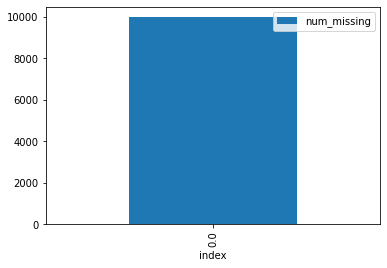

In [11]:
#first we will create missing indicator for features of missing data 
for col in data_store.columns:
    missing=data_store[col].isnull()
    num_missing= np.sum(missing)
    
    if num_missing>0:
        print('created missing indicator for: {}'.format(col))
        data_store['{}_ismissing'.format(col)]=missing 
        
        
#then based on the indicator we will plot histogram values
ismissing_cols=[col for col in data_store.columns if 'ismissing' in col]
data_store['num_missing']=data_store[ismissing_cols].sum(axis=1)

data_store['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index',y='num_missing')

**> The above percentage list and histogram shows that the data provided is cleaned and ready for visualization**

First we will seperate columns and values which needs to be plot on graphs , these seperate pivot tables helps us to plot 

<AxesSubplot:>

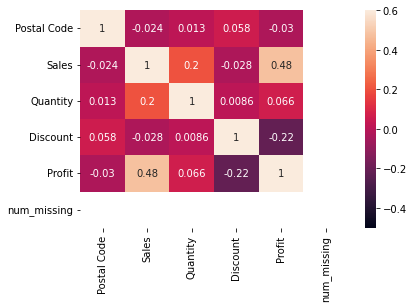

In [12]:
corr=data_store.corr()
sns.heatmap(corr,annot=True,vmin=-.5,vmax=0.6)


In [13]:
category_sales= pd.pivot_table(data=data_store,index='Category',values='Sales',aggfunc=np.sum)
category_sales

,Sales
Category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


In [14]:
category_quantity = pd.pivot_table(data=data_store,index='Category',values='Quantity',aggfunc=np.sum)
category_quantity

,Quantity
Category,
Furniture,8028
Office Supplies,22906
Technology,6939


In [15]:
category_discount=pd.pivot_table(data=data_store,index='Category',values='Discount',aggfunc=np.sum)
category_discount

,Discount
Category,
Furniture,368.89
Office Supplies,947.80
Technology,244.40


In [16]:
category_profit=pd.pivot_table(data=data_store,index='Category',values='Profit',aggfunc=np.sum)
category_profit

,Profit
Category,
Furniture,18451.2728
Office Supplies,122490.8008
Technology,145454.9481


In [17]:
subcategory_sales= pd.pivot_table(data=data_store,index='Sub-Category',values='Sales',aggfunc=np.sum)
subcategory_sales

,Sales
Sub-Category,
Accessories,167380.3180
Appliances,107532.1610
Art,27118.7920
Binders,203412.7330
Bookcases,114879.9963
Chairs,328449.1030
Copiers,149528.0300
Envelopes,16476.4020
Fasteners,3024.2800


In [18]:
subcategory_quantity=pd.pivot_table(data=data_store,index='Sub-Category',values='Quantity',aggfunc=np.sum)
subcategory_quantity

,Quantity
Sub-Category,
Accessories,2976
Appliances,1729
Art,3000
Binders,5974
Bookcases,868
Chairs,2356
Copiers,234
Envelopes,906
Fasteners,914


In [19]:
subcategory_discount=pd.pivot_table(data=data_store,index='Sub-Category',values='Discount',aggfunc=np.sum)
subcategory_discount

,Discount
Sub-Category,
Accessories,60.80
Appliances,77.60
Art,59.60
Binders,567.00
Bookcases,48.14
Chairs,105.00
Copiers,11.00
Envelopes,20.40
Fasteners,17.80


In [20]:
subcategory_profit=pd.pivot_table(data=data_store,index='Sub-Category',values='Profit',aggfunc=np.sum)
subcategory_profit

,Profit
Sub-Category,
Accessories,41936.6357
Appliances,18138.0054
Art,6527.7870
Binders,30221.7633
Bookcases,-3472.5560
Chairs,26590.1663
Copiers,55617.8249
Envelopes,6964.1767
Fasteners,949.5182


# plotting graphs for category against different values parameters 

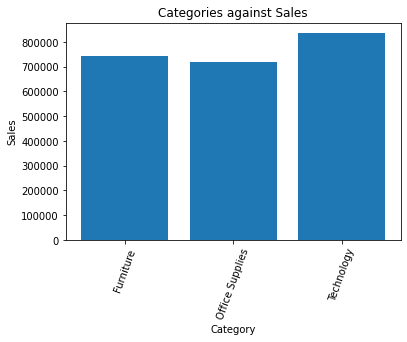

In [21]:
# bar graph of category against sales 
plt.bar(category_sales.index,category_sales['Sales'])

#xticks
plt.xticks(rotation=70)

#x-axis labels 
plt.xlabel('Category')

#y-axis labels 
plt.ylabel('Sales')

#title of graph 
plt.title('Categories against Sales')

#display 
plt.show()

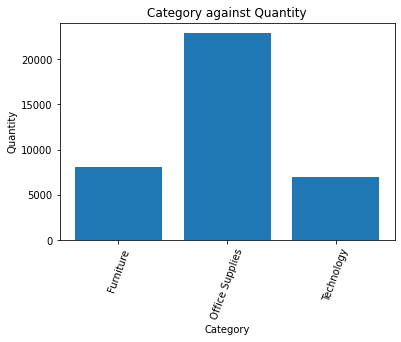

In [22]:
#bar graph against of category against quantity 
plt.bar(category_quantity.index,category_quantity['Quantity'])

#xticks
plt.xticks(rotation=70)

#xlabel
plt.xlabel('Category')

#ylabel
plt.ylabel('Quantity')

#title of graph 
plt.title('Category against Quantity')

#plotting graph 
plt.show()

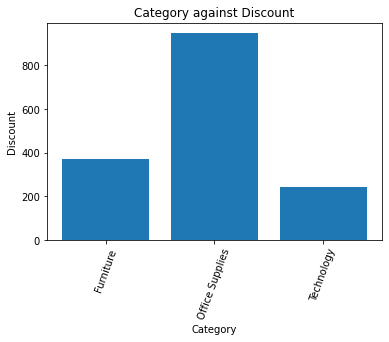

In [23]:
#bar graph of category against discount 
plt.bar(category_discount.index,category_discount['Discount'])

#xticks
plt.xticks(rotation=70)

#xlabel
plt.xlabel('Category')

#ylabel
plt.ylabel('Discount')

#title
plt.title('Category against Discount')

#show plot 
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

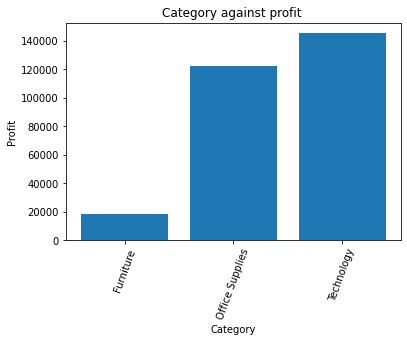

In [24]:
#bar graph of category against profit 
plt.bar(category_profit.index,category_profit['Profit'])

#xticks 
plt.xticks(rotation=70)

#xlabel
plt.xlabel('Category')

#ylabel
plt.ylabel('Profit')

#plt.title
plt.title('Category against profit ')

#show plot 
plt.show

# Plotting graphs of Sub-Category against different values parameters

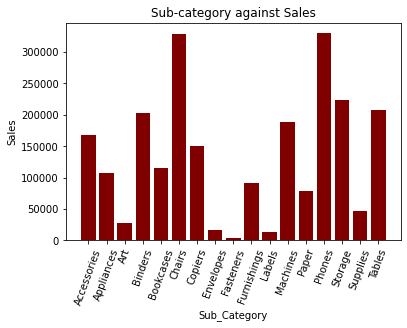

In [25]:
#bar graph of subcategory against sales 
plt.bar(subcategory_sales.index,subcategory_sales['Sales'],color='maroon')

#xticks 
plt.xticks(rotation=70)

#xlabel
plt.xlabel('Sub_Category')

#ylabel()
plt.ylabel('Sales')

#title
plt.title('Sub-category against Sales')

#show plot 
plt.show()

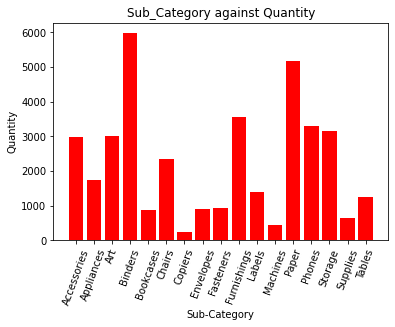

In [26]:
#bar graph of sub category against qauntity 
plt.bar(subcategory_quantity.index,subcategory_quantity['Quantity'],color='r')

#xticks
plt.xticks(rotation=70)

#xlabel
plt.xlabel('Sub-Category')

#ylabel
plt.ylabel('Quantity')

#title
plt.title('Sub_Category against Quantity')

#show plot 
plt.show()

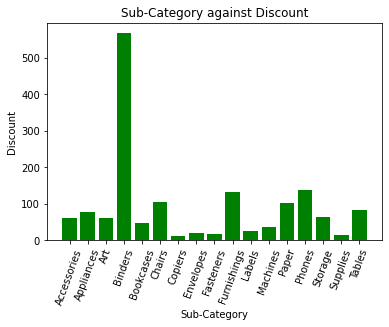

In [27]:
#bar graph of subcategory against discount 
plt.bar(subcategory_discount.index,subcategory_discount['Discount'],color='green')

#xticks
plt.xticks(rotation=70)

#xlabel
plt.xlabel('Sub-Category')

#ylabel
plt.ylabel('Discount')

#title 
plt.title('Sub-Category against Discount')

#showing graph 
plt.show()

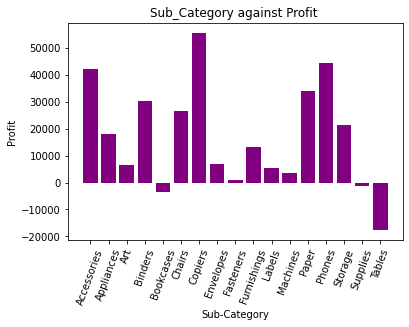

In [28]:
#bar graph of subcategory against profit 
plt.bar(subcategory_profit.index,subcategory_profit['Profit'], color='purple')

#xticks
plt.xticks(rotation=70)

#xlabels
plt.xlabel('Sub-Category')

#ylabels
plt.ylabel('Profit')

#title 
plt.title('Sub_Category against Profit ')

#show graph 
plt.show()

store-data



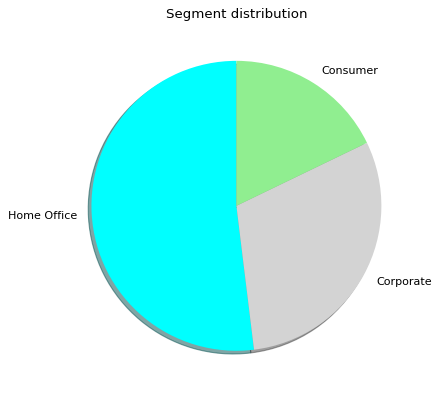

In [29]:
from matplotlib.pyplot import figure
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

colors=['aqua','lightgrey','lightgreen','#D0F9B1','khaki','grey']
data_store['Segment']=np.where(data_store['Segment']=="Consumer,Corporate",'Non-binary',data_store['Segment'])
segment = data_store['Segment'].value_counts()
label=segment.index
size=segment.values
mylabels=["Home Office","Corporate","Consumer"]

myexplode = [0.2, 0, 0, 0]
fig_size=figure(figsize=(12,6),dpi=80)
plt.pie(size ,startangle=90,shadow=True, colors=colors, labels=mylabels)
plt.title("Segment distribution")
plt.show()

In [30]:
data_store['Ship Mode'].values

array(['Second Class', 'Second Class', 'Second Class', ...,
       'Standard Class', 'Standard Class', 'Second Class'], dtype=object)

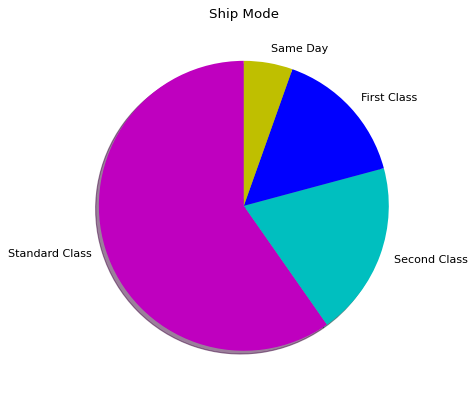

In [31]:
from matplotlib.pyplot import figure 
colors=['m','c','b','y','k','w']
ship_mode = data_store['Ship Mode'].value_counts()
label= ship_mode.index
size=ship_mode.values
myexplode=[0.2,0.0,0.0,0.0]
fig_size=figure(figsize=(12,6),dpi=80)
plt.pie(size,labels=label,shadow=True,colors=colors,startangle=90)
plt.title("Ship Mode")
plt.show()

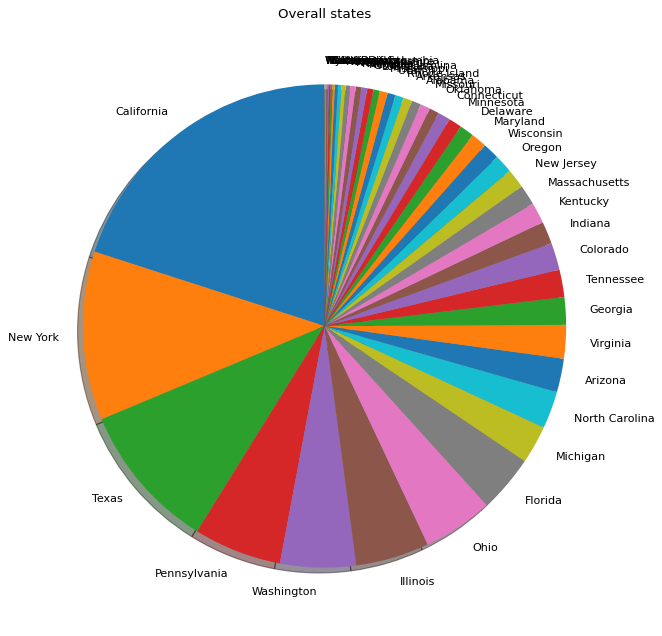

In [32]:
from matplotlib.pyplot import figure 
state=data_store['State'].value_counts()
label= state.index
size=state.values
fig_size=figure(figsize=(20,10),dpi=80)
plt.pie(size,labels=label,shadow=True,startangle=90)
plt.title("Overall states")
plt.show()

<AxesSubplot:xlabel='Segment', ylabel='count'>

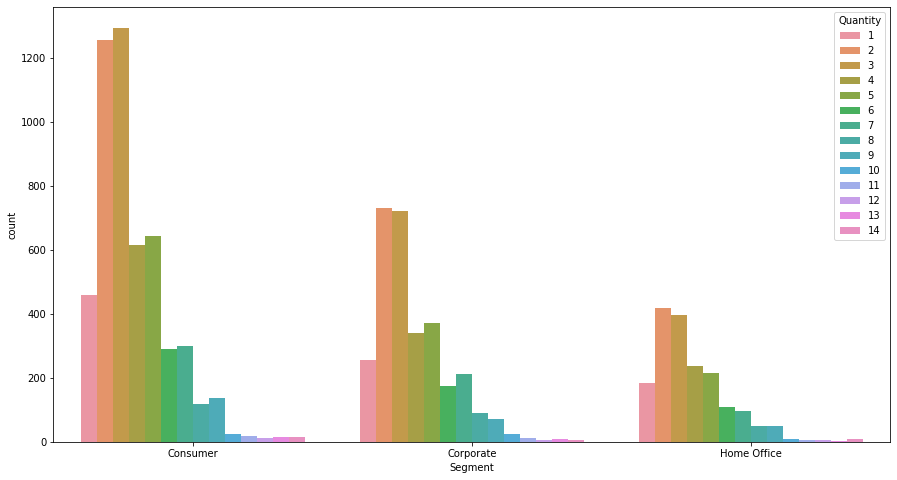

In [33]:
plt.figure(figsize=(15,8))
sns.countplot(x='Segment',data=data_store,hue='Quantity')

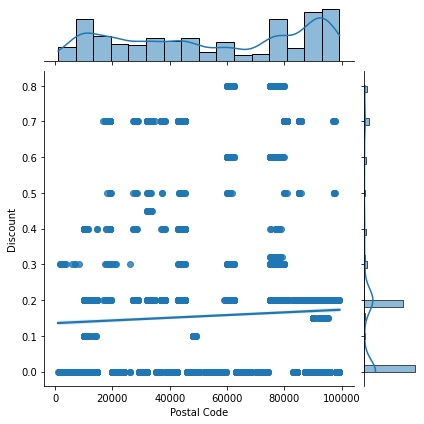

In [34]:
sns.jointplot(x='Postal Code',y='Discount',data=data_store,kind='reg')

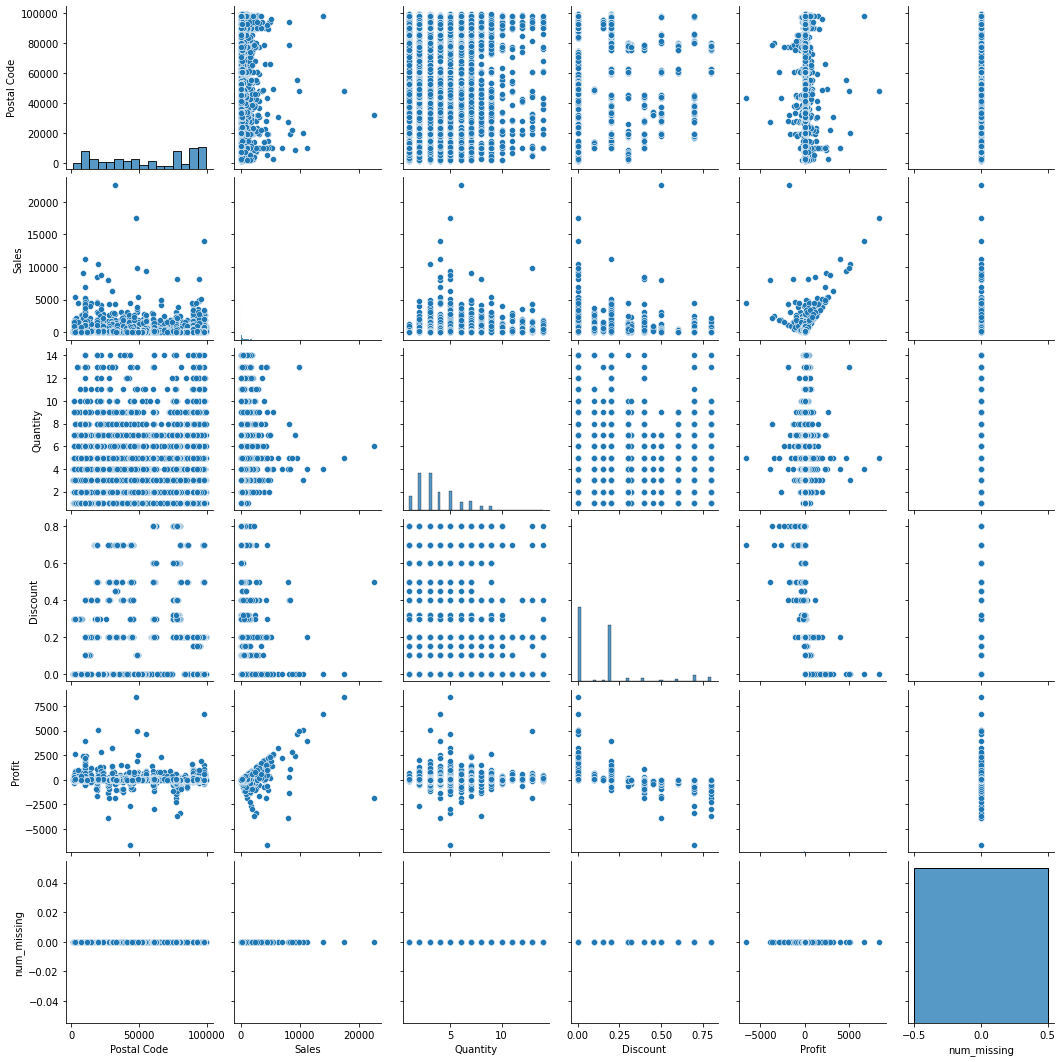

In [35]:
sns.pairplot(data_store)

<AxesSubplot:xlabel='Region', ylabel='count'>

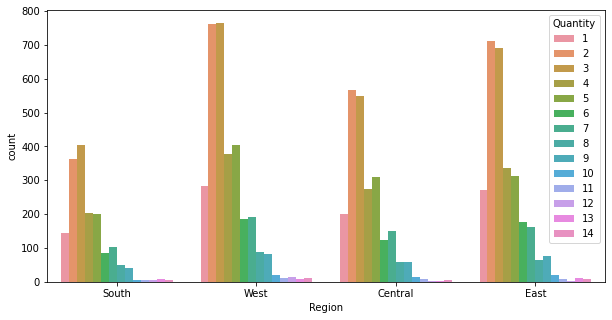

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x="Region",data=data_store, hue="Quantity")


In [37]:
data_sunburst=data_store.groupby(by=["Region","State","Postal Code","Discount"]).count()[["Quantity"]].rename(columns={"Quantity":"Count"})
data_sunburst=data_sunburst.reset_index()
data_sunburst.head()

,Region,State,Postal Code,Discount,Count
0,Central,Illinois,60004,0.2,1
1,Central,Illinois,60016,0.2,2
2,Central,Illinois,60016,0.3,1
3,Central,Illinois,60016,0.5,1
4,Central,Illinois,60016,0.6,1


In [38]:
import plotly.express as px 
fig=px.sunburst(data_sunburst,
               path=["Region","State","Discount"],
               values="Count",
               title="Sunburst Visualization of data",
               color_continuous_scale="BrBG",
               width=750,height=750)

fig.show()

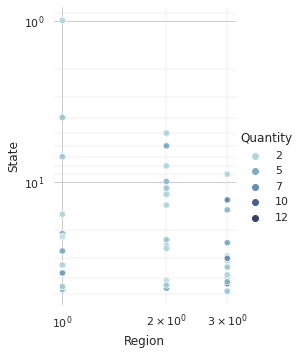

In [39]:
import seaborn as sns 
sns.set_theme(style="whitegrid")

cmap=sns.cubehelix_palette(rot=-.2,as_cmap=True)
g=sns.relplot(data=data_store,
             x="Region",y="State",
             hue="Quantity",
             palette=cmap, sizes=(10, 200),
             )
g.set(xscale="log",yscale="log")
g.ax.xaxis.grid(True,"minor",linewidth=.25)
g.ax.yaxis.grid(True,"minor",linewidth=.25)
g.despine(left=True,bottom=True)